In [37]:
import pandas as pd 
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [23]:
df = pd.read_csv("cleaned.csv")
y = df.iloc[:, df.columns.get_loc("FA-RA Difference")]
X = df.iloc[:, df.columns.get_loc("FA-RA Difference") + 1:]

0      44.244572
1      40.105702
2      65.338376
3      58.635702
4      45.910903
         ...    
381    32.814326
382    55.293510
383    45.896048
384    29.204815
385    46.922211
Name: FA-RA Difference, Length: 386, dtype: float64


In [19]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [31]:
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(scaled_X)
principal = pd.DataFrame(data=principal_components, columns=["pc1", "pc2"])
principal["y"] = y 
principal

,pc1,pc2,y
0,-3.160585,-1.362946,44.244572
1,-4.057963,2.433472,40.105702
2,-2.554636,-1.053478,65.338376
3,-2.029862,-0.210384,58.635702
4,-2.564620,-1.618171,45.910903
...,...,...,...
381,2.450353,1.245220,32.814326
382,1.089956,0.928988,55.293510
383,1.731418,1.882410,45.896048
384,1.912722,1.833497,29.204815


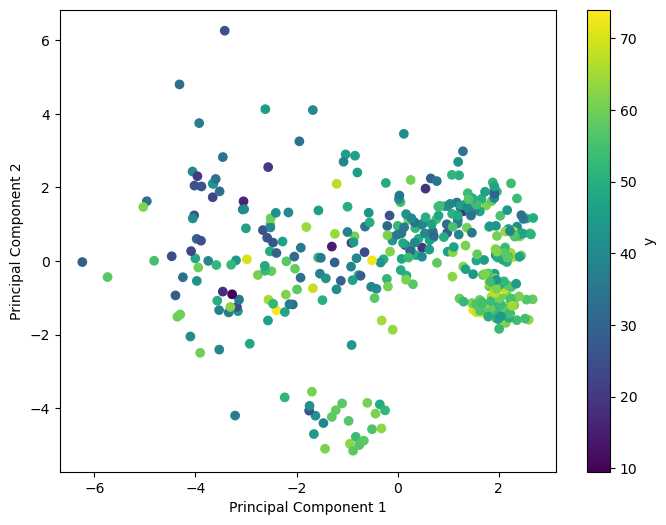

In [45]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(
    x=principal['pc1'],
    y=principal['pc2'],
    c=principal['y'],
    cmap=plt.get_cmap('viridis')
)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('y')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.savefig("n2pca.png")
